# Project Individual assignment 1

In this report, we will look into NVIDIA stock prices. We have two datasets, data about the stock movement, and a dataset containing news articles. The goal of the assignment is to use the news articles in order to predict the stock movement. We will use NLP methods to process the news article into more interpretable variables which can be used to predict the stock movement. 

The knowledge that we gained from lecture 2 and 3 will be used for this assignment. In lecture 2 we covered dataset filtering, preprocessing and analysis. While in lecture 3 we covered vector representation, Machine learning model and prediction. 

## Importing of packages 

In [104]:
import pandas as pd
import numpy as np
import seaborn as sns
import re

## Importing of data

In [66]:
stock_data = pd.read_csv("data/NVDA.csv")
news_articles_data = pd.read_csv("data/us_equities_news_dataset.csv")

In [67]:
news_articles_data = news_articles_data[:1000]

# EDA

In [68]:
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-01-25,0.044271,0.045833,0.041016,0.045313,0.041562,510480000
1,1999-01-26,0.045833,0.046745,0.041146,0.041797,0.038337,343200000
2,1999-01-27,0.041927,0.042969,0.039583,0.041667,0.038218,244368000
3,1999-01-28,0.041667,0.041927,0.041276,0.041536,0.038098,227520000
4,1999-01-29,0.041536,0.041667,0.039583,0.039583,0.036307,244032000


In [69]:
news_articles_data

,id,ticker,title,category,content,release_date,provider,url,article_id
0,221515,NIO,Why Shares of Chinese Electric Car Maker NIO A...,news,What s happening\nShares of Chinese electric c...,2020-01-15,The Motley Fool,https://invst.ly/pigqi,2060327
1,221516,NIO,NIO only consumer gainer Workhorse Group amon...,news,Gainers NIO NYSE NIO 7 \nLosers MGP Ingr...,2020-01-18,Seeking Alpha,https://invst.ly/pje9c,2062196
2,221517,NIO,NIO leads consumer gainers Beyond Meat and Ma...,news,Gainers NIO NYSE NIO 14 Village Farms In...,2020-01-15,Seeking Alpha,https://invst.ly/pifmv,2060249
3,221518,NIO,NIO NVAX among premarket gainers,news,Cemtrex NASDAQ CETX 85 after FY results \n...,2020-01-15,Seeking Alpha,https://invst.ly/picu8,2060039
4,221519,NIO,PLUG NIO among premarket gainers,news,aTyr Pharma NASDAQ LIFE 63 on Kyorin Pharm...,2020-01-06,Seeking Alpha,https://seekingalpha.com/news/3529772-plug-nio...,2053096
...,...,...,...,...,...,...,...,...,...
995,222510,UBER,Colombia orders Uber to improve data security ...,news,BOGOTA Reuters Colombia has given ride hai...,2019-07-23,Reuters,https://www.investing.com/news/technology-news...,1931913
996,222511,UBER,Starbucks to expand delivery with UberEats acr...,news,Reuters Starbucks Corp O SBUX said on ...,2019-07-23,Reuters,https://www.investing.com/news/stock-market-ne...,1932143
997,222512,UBER,Uber Freight launches in Germany faces local ...,news,By Douglas Busvine FRANKFURT Reuters U S ...,2019-07-24,Reuters,https://www.investing.com/news/technology-news...,1932473
998,222513,UBER,Uber Sun Mobility tie up to offer electric th...,news,BENGALURU Reuters Ride hailing company Ube...,2019-07-24,Reuters,https://www.investing.com/news/technology-news...,1932835


# Domain
I assume the domain is news, since we have a news article dataset. So the the writing style will be understandable for the audience of news readers, which may differ a lot depending on the news outline. But it will probably be not super technical and jargon heavy. For the language, I also do not know what language the data is from, but from initial viewing, it is prodomnatly engish. The language will be dependent on the provider of the news article, and the language of articles from a distinct provider will probably stay constant.

### Corpus characteristics

The corpus of data consists of inidivudal news articles content and its title. 
- the format of the text is plain text.
- The encoding is not yet determined, currently we read the csv with encoding UTF-8, we do not see unknown characters, so it is probably correct. We do have to test this further
- Text unit 
    - title: sentence of words
    - news article content: paragraphs consisting of sentences of words
- length of text: undermined for now, we must check this later


### Corpus documents understanding
- Vocuabulary: How rich is the text, what is the lexical variation of the text?
- corpus homogeneity: the news articles will be filtered for articles that relate to NVIDIA. therefore the resulting data, will be quite homogenous, but since different providers can have written the text, the text will be more homogenous of articles between the same provider about NVIDIA compared to articles from other providers that are about NVIDIA
- 

## Data understanding
- the number of documents (equal to number of rows which equals news articles) in the complete corpus = 221513 news articles
- number of documents that relate to NVIDA? 
- Number of average documents per news provider
- proportion of documents that are about NVIDIA per news provider 
- proportion of documents that are about NVIDIA corpus as a whole
- average words per article
    - corpus as a whole
    - per news provider
    - per article that is about NVIDIA
    - per article that is about NVIDIA per news provider
- Frequently occurring words
    - when the topic is NVIDIA 
    - when the topic is not NVIDIA
    - we can make this also specific for each news provider, to see if there are differences
    - What is the lexical variation for each of these different interpretations of frequently occurring words?
- Average sentence length
    -  when the topic is NVIDIA 
    - when the topic is not NVIDIA
    - we can make this also specific for each news provider, to see if there are differences


In [99]:
news_articles_data = news_articles_data.drop(["content_nr_words","title_nr_words"], axis=1)

In [100]:
news_articles_data

,id,ticker,title,category,content,release_date,provider,url,article_id
0,221515,NIO,Why Shares of Chinese Electric Car Maker NIO A...,news,What s happening\nShares of Chinese electric c...,2020-01-15,The Motley Fool,https://invst.ly/pigqi,2060327
1,221516,NIO,NIO only consumer gainer Workhorse Group amon...,news,Gainers NIO NYSE NIO 7 \nLosers MGP Ingr...,2020-01-18,Seeking Alpha,https://invst.ly/pje9c,2062196
2,221517,NIO,NIO leads consumer gainers Beyond Meat and Ma...,news,Gainers NIO NYSE NIO 14 Village Farms In...,2020-01-15,Seeking Alpha,https://invst.ly/pifmv,2060249
3,221518,NIO,NIO NVAX among premarket gainers,news,Cemtrex NASDAQ CETX 85 after FY results \n...,2020-01-15,Seeking Alpha,https://invst.ly/picu8,2060039
4,221519,NIO,PLUG NIO among premarket gainers,news,aTyr Pharma NASDAQ LIFE 63 on Kyorin Pharm...,2020-01-06,Seeking Alpha,https://seekingalpha.com/news/3529772-plug-nio...,2053096
...,...,...,...,...,...,...,...,...,...
995,222510,UBER,Colombia orders Uber to improve data security ...,news,BOGOTA Reuters Colombia has given ride hai...,2019-07-23,Reuters,https://www.investing.com/news/technology-news...,1931913
996,222511,UBER,Starbucks to expand delivery with UberEats acr...,news,Reuters Starbucks Corp O SBUX said on ...,2019-07-23,Reuters,https://www.investing.com/news/stock-market-ne...,1932143
997,222512,UBER,Uber Freight launches in Germany faces local ...,news,By Douglas Busvine FRANKFURT Reuters U S ...,2019-07-24,Reuters,https://www.investing.com/news/technology-news...,1932473
998,222513,UBER,Uber Sun Mobility tie up to offer electric th...,news,BENGALURU Reuters Ride hailing company Ube...,2019-07-24,Reuters,https://www.investing.com/news/technology-news...,1932835


In [101]:
def turn_text_into_nr_words(text):
    # :TODO needs improvements, should use same process as tokenization to count nr of words eventually
    return len([word for word in re.split(" ",text) if word != ""])

def add_nr_words_column_of_text(df, column_name_to_count):
    """
    
    :param df: df to process
    :param column_name_to_count: the column name to count the nr of words present
    :return: 
    """
    column_index = df.columns.get_loc(column_name_to_count)
    nr_word_column_name = f"{column_name_to_count}_nr_words"
    if not nr_word_column_name in df.columns:
        df.insert(loc=column_index+1, column=nr_word_column_name, value=0)
    for index, row in df.iterrows():
        news_articles_data.at[index, nr_word_column_name] = turn_text_into_nr_words(row[column_name_to_count])
        

add_nr_words_column_of_text(df=news_articles_data, column_name_to_count="title")
add_nr_words_column_of_text(df=news_articles_data, column_name_to_count="content")

In [103]:
news_articles_data.describe()

,id,title_nr_words,content_nr_words,article_id
count,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,222014.500000,10.341000,644.573000,9.825072e+07
std,288.819436,2.631282,475.425378,9.923375e+07
min,221515.000000,2.000000,21.000000,1.606489e+06
25%,221764.750000,9.000000,343.750000,2.012144e+06
50%,222014.500000,10.000000,550.000000,2.063434e+06
75%,222264.250000,12.000000,824.000000,2.004582e+08
max,222514.000000,21.000000,4097.000000,2.005004e+08


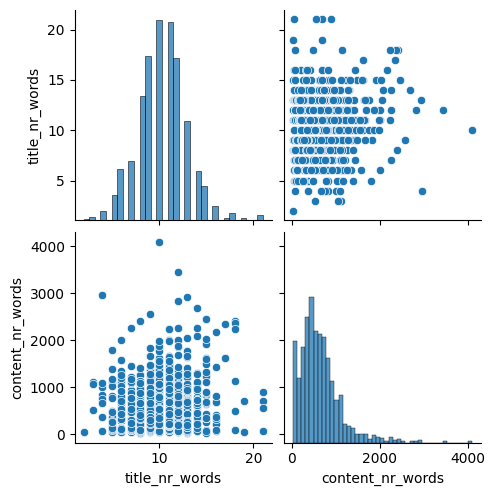

In [105]:
sns.pairplot(news_articles_data[['title_nr_words', 'content_nr_words']])


### Domain considerations

How do we make sure that we detect if there if fake news? If most articles within a timeframe say one thing, then when a low number of articles says something completely different, it might be fake. We must read this ourself to find out. Also we can do this separately  for each provider, it is probable that when a news provider has some fake news, it might also result in more fake news when more articles from the same provider.
- Providers that provide fake news, are more likely to have more fake news
- Providers that do not do rigerous research about a topic and have some fake news, are more likely to have other fake news as well.
- The country of origin of a provider might also change the perspective of a news writer. for example in china, where people are not free to say what they want to say. Are more likely to provide content that is in the same line of reasoning as the politics in the country. resulting in more fake news. BUTTTT Fake news is still news and it influences people's buying decision, thus impact the stock price.

# Text cleaning
We must clean the text. there might be mistakes in the text of other content. we don't know for sure, so we have to check for problems in text, this might be provider related as well.

We might also have to consider the authors name in the article, if one author writes fake news, he might write more fake news. We have to check if the name is in the article 

# TOkenization
We have to think of tokenizing the words, or possible multi word tokens. 

# Text normalization
How will we normalize the text?

If needed reduce vocabulary variation by
- removing numbers
(but what if you need to find dates & amounts?)
-  removing punctuation & special characters (e.g. @#, -, *, ...)
(but what if you need to identify sentiment?)
- convert into lower case
(but what if you need to find names of people & products?)
- lemmatization or stemming
(but what if you unnecessarily increase ambiguity?

Does my corpus have a lot of variation?
• What is the ratio of unique tokens vs. my
total token number?
• Is it likely that I lose information that I need?
• How is modelling affected by the tokens I
remove or normalize?
• Do I remove important text context?